# Summarizing and Computing Descriptive Statistics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as stats

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Just a quick word on displaying DataFrames

In [3]:
#All display options available
pd.describe_option()

compute.use_bottleneck : bool
    Use the bottleneck library to accelerate if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
compute.use_numba : bool
    Use the numba engine option for select operations if it is installed,
    the default is False
    Valid values: False,True
    [default: False] [currently: False]
compute.use_numexpr : bool
    Use the numexpr library to accelerate computation if it is installed,
    the default is True
    Valid values: False,True
    [default: True] [currently: True]
display.chop_threshold : float or None
    if set to a float value, all float values smaller then the given threshold
    will be displayed as exactly 0 by repr and friends.
    [default: None] [currently: None]
display.colheader_justify : 'left'/'right'
    Controls the justification of column headers. used by DataFrameFormatter.
    [default: right] [currently: right]
display.column_space No description available.
    [defa

In [4]:
#Returns the number of rows that will be displayed 
pd.get_option('display.max_rows')

60

In [5]:
#Change the number of rows to be displayed. None prints all the rows in the data frame
pd.set_option('display.max_rows', None)

In [6]:
#To reset any changes :
pd.reset_option('display.max_rows')

## Summarize data

In [7]:
df = pd.DataFrame(np.arange(8).reshape(4,2),
                     index=['a', 'b', 'c', 'd'],
                     columns=['one', 'two'])
df

,one,two
a,0,1
b,2,3
c,4,5
d,6,7


In [8]:
#Let's get the info for this DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   one     4 non-null      int32
 1   two     4 non-null      int32
dtypes: int32(2)
memory usage: 64.0+ bytes


In [9]:
#Should always check the dimensions of our DataFrame
df.shape

(4, 2)

In [10]:
#Let's look at the number of values in the dataframe
df.count()

one    4
two    4
dtype: int64

In [11]:
#If we want to know how many unique values there are in a given column
df.two.nunique()
# df

#Sanity check, let's change a value and check again :
df['two'].b = 5  # column 2, row b
df.count()
df.info()
df.two.nunique()

#Or get the number of unique values for every column
df.nunique()

4

one    4
two    4
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   one     4 non-null      int32
 1   two     4 non-null      int32
dtypes: int32(2)
memory usage: 236.0+ bytes


3

one    4
two    3
dtype: int64

In [12]:
#What are those unique values ?
df.two.unique()

array([1, 5, 7])

In [13]:
#Let's add a new column with names 
df['name'] = ['John', 'Tim', 'John', 'Chris']
df

,one,two,name
a,0,1,John
b,2,5,Tim
c,4,5,John
d,6,7,Chris


In [14]:
#Let's now get the number of times each name appears:
df['name'].value_counts()

John     2
Tim      1
Chris    1
Name: name, dtype: int64

### There are two way of going about descriptive statistics : 
### - describing the values of observations in a variable : sum, mean, median, min/max
### - describing the variable spread : sd, variance, counts, quartiles

### Pivot tables are making a come back

In [15]:
df

,one,two,name
a,0,1,John
b,2,5,Tim
c,4,5,John
d,6,7,Chris


In [16]:
#Remember pivot tables will group your data and provide helpful summaries
pd.pivot_table(df, values = ['one', 'two'], index = ['name'], aggfunc=np.mean)

,one,two
name,,
Chris,6,7
John,2,3
Tim,2,5


In [17]:
#We can calculate mutliple statistics at once :
data = pd.pivot_table(df, values = ['one', 'two'], index = ['name'], aggfunc=[np.mean, np.sum])
data

mean     sum    
       one two one two
name                  
Chris    6   7   6   7
John     2   3   4   6
Tim      2   5   2   5

In [18]:
#We can use the unstack() function to change how we display the results based on the function instead of index
pd.DataFrame(pd.pivot_table(df, values = ['one', 'two'], 
                             index = ['name'], aggfunc=[np.mean, np.sum]).unstack())

#Let's access the data for John only. 
data.loc['John']

#Now lets access John's mean values
data.loc['John', 'mean']

0
         name    
mean one Chris  6
         John   2
         Tim    2
     two Chris  7
         John   3
         Tim    5
sum  one Chris  6
         John   4
         Tim    2
     two Chris  7
         John   6
         Tim    5

mean  one    2
      two    3
sum   one    4
      two    6
Name: John, dtype: int32

one    2
two    3
Name: John, dtype: int32

### Notice that for the parameter aggfunc we can pass in numpy functions. A list of those functions can be found [here](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)

In [19]:
#The argument aggfunc can be passed in a variety of functions to calculate different statistics on different 
#columns
pd.pivot_table(df, values = ['one', 'two'], index = ['name'], aggfunc={'one':[np.mean, np.max], 'two':np.sum})

one      two
      amax mean sum
name               
Chris  6.0  6.0   7
John   4.0  2.0   6
Tim    2.0  2.0   5

### We can also use the aggregate function on the dataframes and pass in numpy functions

In [20]:
#Aggregate takes in numpy functions
df['one'].aggregate([np.sum, np.min])

sum     12
amin     0
Name: one, dtype: int64

### Let's now look at some of the pandas built-in stats functions

In [21]:
#Get total values for each column (row wise)
df.sum(numeric_only=True)
# df
df.sum()

#We have some interesting results....

one    12
two    18
dtype: int64

one                   12
two                   18
name    JohnTimJohnChris
dtype: object

In [22]:
#Get the mean value for each column (row wise)
df[['one','two']].mean(axis=0) #column - can't do mean of names
df[['one','two']].mean(axis=1) #row

one    3.0
two    4.5
dtype: float64

a    0.5
b    3.5
c    4.5
d    6.5
dtype: float64

In [23]:
#Get the maximum value for each column (row wise)
df.max()

one       6
two       7
name    Tim
dtype: object

In [24]:
#Get the maximum value for each column (row wise)
df.min()

one         0
two         1
name    Chris
dtype: object

In [25]:
#Say we want to get the location of where the maximum/minimum value for column two is...
df.two.idxmax()  # index value is 'd'.

'd'

In [26]:
df.loc[df.two.idxmax()]  # get row with max value of column two

one         6
two         7
name    Chris
Name: d, dtype: object

In [27]:
# Can u guess a method to get a summary stats?
df.describe()

,one,two
count,4.000000,4.000000
mean,3.000000,4.500000
std,2.581989,2.516611
min,0.000000,1.000000
25%,1.500000,4.000000
50%,3.000000,5.000000
75%,4.500000,5.500000
max,6.000000,7.000000


In [28]:
#We get a neat little table with all the stats that we calculated before
df.describe(include='all')


pd.pivot_table(df, values = ['one', 'two'], index = ['name'], 
                aggfunc={'one':[np.mean, np.max], 
                         'two':[np.sum, np.min],
                        'name':np.unique})

,one,two,name
count,4.000000,4.000000,4
unique,NaN,NaN,3
top,NaN,NaN,John
freq,NaN,NaN,2
mean,3.000000,4.500000,NaN
std,2.581989,2.516611,NaN
min,0.000000,1.000000,NaN
25%,1.500000,4.000000,NaN
50%,3.000000,5.000000,NaN
75%,4.500000,5.500000,NaN


name  one       two    
      unique amax mean amin sum
name                           
Chris  Chris  6.0  6.0    7   7
John    John  4.0  2.0    1   6
Tim      Tim  2.0  2.0    5   5

In [29]:
#Only include object types
df.describe(include=['object'])

,name
count,4
unique,3
top,John
freq,2


In [30]:
#Include object and float types
df.describe(include=['object', 'float'])

,name
count,4
unique,3
top,John
freq,2


In [31]:
#We can filter the data first and then describe it. 
df[df['name'] == 'John'].describe()

,one,two
count,2.000000,2.000000
mean,2.000000,3.000000
std,2.828427,2.828427
min,0.000000,1.000000
25%,1.000000,2.000000
50%,2.000000,3.000000
75%,3.000000,4.000000
max,4.000000,5.000000


### A quick look at a dataframe with NaN values

In [32]:
df2 = pd.DataFrame([[1.4, np.nan], [7.1, -4.5],
                       [np.nan, np.nan], [0.75, -1.3]],
                     index=['a', 'b', 'c', 'd'],
                     columns=['one', 'two'])
df2

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [33]:
#By default the sum() function skips NaN values
df2.sum()

one    9.25
two   -5.80
dtype: float64

In [34]:
#If we do not, then we get NaN whenever there are NaN values
df2.sum(skipna=False)

one   NaN
two   NaN
dtype: float64

In [35]:
#These functions will by default ignore the NaN values, it is not a reason to not deal with them though...
df2.describe()

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


## There is a built-in statistics package called **drumroll* * statistics....

All documentation for this package can be found [here](https://docs.python.org/3/library/statistics.html#module-statistics)

This package includes most of the functions we've just seen like : mean, mode, median, quantiles and so on.

### Demo with a dataframe that has more than a few values in it

In [36]:
cars = sns.load_dataset('car_crashes')
cars.head()

#Let's focus on insurance premiums

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [37]:
#Let's use some the statistics we've seen but using the statistics package :

#Let's check out the mean :
stats.mean(cars['ins_premium'])

#Let's get the median insurance premium :
stats.median(cars['ins_premium'])

# #Is the median an actual value in the data or was it interpolated ?
cars[cars['ins_premium'] == 858.97]

# #Assuming that the value is not in the data set, let's use the median_low, median_high
stats.median_low(cars['ins_premium'])
stats.median_high(cars['ins_premium'])  #Why are we getting the same value ?....

886.9576470588236

858.97

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC


858.97

858.97

In [38]:
#Some other statistics in the package :

# stats.mode(cars['ins_premium'])

#Add a few values to the series
cars_prem = cars['ins_premium']
cars_prem_concat = cars_prem.append(pd.Series([2,2,2,2,1,1,1]))

#Let's look at the mode now :
stats.mode(cars_prem_concat)

2.0

In [39]:
#If we look at the spread of the variable ins_prem :

# Population standard deviation of data.
stats.pstdev(cars['ins_premium'])

# Population variance of data.
stats.pvariance(cars['ins_premium'])

# Sample standard deviation of data.
stats.stdev(cars['ins_premium'])

# Sample variance of data.
stats.variance(cars['ins_premium'])

176.53962830789897

31166.240363091118

178.29628479122312

31789.56517035294

## Let's look at another data set

In [40]:
#Let's read in some baby names :
df_names = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')
df_names

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
...,...,...,...,...,...,...,...
1016390,5647421,5647422,Seth,2014,M,WY,5
1016391,5647422,5647423,Spencer,2014,M,WY,5
1016392,5647423,5647424,Tyce,2014,M,WY,5
1016393,5647424,5647425,Victor,2014,M,WY,5


In [41]:
df_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016395 entries, 0 to 1016394
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1016395 non-null  int64 
 1   Id          1016395 non-null  int64 
 2   Name        1016395 non-null  object
 3   Year        1016395 non-null  int64 
 4   Gender      1016395 non-null  object
 5   State       1016395 non-null  object
 6   Count       1016395 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 54.3+ MB


In [42]:
df_names.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [43]:
#Drop useless columns like ID and Unnamed:0
df_names.drop(['Unnamed: 0', 'Id'], axis=1, inplace=True)
df_names

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
...,...,...,...,...,...
1016390,Seth,2014,M,WY,5
1016391,Spencer,2014,M,WY,5
1016392,Tyce,2014,M,WY,5
1016393,Victor,2014,M,WY,5


In [44]:
#Let's get the number of names per gender :
df_names['Gender'].value_counts()

df_names.groupby('Gender').sum()

F    558846
M    457549
Name: Gender, dtype: int64

,Year,Count
Gender,,
F,1122736288,16380293
M,919255329,19041199


In [45]:
#Number of unique names regardless of gender :
df_names['Name'].nunique()

17632

In [46]:
#What is the most popular name there is ?....
df_names.groupby('Name').Count.sum().idxmax()

'Jacob'

In [47]:
#Let's look at the 5 most popular names 
df_names.groupby('Name').Count.sum().nlargest(10)

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
William     197894
Joshua      191551
Sophia      191446
Daniel      191440
Emily       190318
Name: Count, dtype: int64

In [48]:
#We can also sort the names based on their count
df_names.sort_values("Count", ascending = 0).head(10)

,Name,Year,Gender,State,Count
107416,Daniel,2004,M,CA,4167
110097,Daniel,2005,M,CA,3914
115739,Daniel,2007,M,CA,3865
112872,Daniel,2006,M,CA,3826
107417,Anthony,2004,M,CA,3805
115740,Anthony,2007,M,CA,3782
112873,Anthony,2006,M,CA,3774
118707,Daniel,2008,M,CA,3749
110098,Anthony,2005,M,CA,3745
112874,Angel,2006,M,CA,3687


In [49]:
#Let's look at the summary of all of these statistics :
pd.DataFrame(df_names['Count'].describe())

,Count
count,1.016395e+06
mean,3.485012e+01
std,9.739735e+01
min,5.000000e+00
25%,7.000000e+00
50%,1.100000e+01
75%,2.600000e+01
max,4.167000e+03


In [50]:
#Let's take a look at the total count for each name :
df_names.groupby('Name').Count.sum()

Name
Aaban        12
Aadan        23
Aadarsh       5
Aaden      3426
Aadhav        6
           ... 
Zyra         42
Zyrah        11
Zyren         6
Zyria        59
Zyriah       58
Name: Count, Length: 17632, dtype: int64

In [51]:
# and the highest count :
df_names.groupby('Name').Count.sum().max()

# which is...
df_names.groupby('Name').Count.sum().idxmax()

242874

'Jacob'

In [52]:
#Let's look at the pandas built-in stats function again :
df_names.describe()

,Year,Count
count,1.016395e+06,1.016395e+06
mean,2.009053e+03,3.485012e+01
std,3.138293e+00,9.739735e+01
min,2.004000e+03,5.000000e+00
25%,2.006000e+03,7.000000e+00
50%,2.009000e+03,1.100000e+01
75%,2.012000e+03,2.600000e+01
max,2.014000e+03,4.167000e+03


In [53]:
#Let's filter out some data using multiple conditions :
df_names[(df_names.Count >= 2000) & (df_names.Year >= 2012)].head()

# We can filter based on other criteria :
df_names[df_names.Name.isin(['Sophia','Emma'])].head()

# and again :
df_names[df_names.Name != 'Sophia'].head()

,Name,Year,Gender,State,Count
95393,Sophia,2012,F,CA,3634
95394,Isabella,2012,F,CA,3106
95395,Emma,2012,F,CA,2449
95396,Emily,2012,F,CA,2430
95397,Mia,2012,F,CA,2324


,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
9,Sophia,2004,F,AK,28
205,Emma,2005,F,AK,49
217,Sophia,2005,F,AK,27
418,Emma,2006,F,AK,49


,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41


In [54]:
# We might need to do some preprocessing on strings before working with them :
df_names['Name'].str.upper()
# df_names

# we also have lower(), title()

# Other preprocessing :
# Get length of string :
df_names['Name'].str.len()

# Contains part of a word/term :
df_names[df_names['Name'].str.contains('m', case=False)]

# pd.Series.str.contains?

# We might need to replace part of the string :
df_names['Name'].str.replace('original_word', 'replacement_word')

0             EMMA
1          MADISON
2           HANNAH
3            GRACE
4            EMILY
            ...   
1016390       SETH
1016391    SPENCER
1016392       TYCE
1016393     VICTOR
1016394     WAYLON
Name: Name, Length: 1016395, dtype: object

0          4
1          7
2          6
3          5
4          5
          ..
1016390    4
1016391    7
1016392    4
1016393    6
1016394    6
Name: Name, Length: 1016395, dtype: int64

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
4,Emily,2004,F,AK,41
24,Mackenzie,2004,F,AK,20
27,Samantha,2004,F,AK,18
...,...,...,...,...,...
1016357,Remington,2014,M,WY,6
1016359,Simon,2014,M,WY,6
1016367,Cameron,2014,M,WY,5
1016381,Myles,2014,M,WY,5


0             Emma
1          Madison
2           Hannah
3            Grace
4            Emily
            ...   
1016390       Seth
1016391    Spencer
1016392       Tyce
1016393     Victor
1016394     Waylon
Name: Name, Length: 1016395, dtype: object

In [55]:
#We want control over the stats we get :
df_names.groupby(['Name']).Count.agg(['sum','mean','max','min']).head()


# We can create a multi-index table with the stats we want :
df_names.groupby(['Year','Gender']).Count.agg(['sum', 'mean', 'min', 'max'])

,sum,mean,max,min
Name,,,,
Aaban,12,6.000000,6,6
Aadan,23,5.750000,7,5
Aadarsh,5,5.000000,5,5
Aaden,3426,17.479592,158,5
Aadhav,6,6.000000,6,6


sum       mean  min   max
Year Gender                               
2004 F       1523496  31.684712    5  3416
     M       1770488  46.182226    5  4167
2005 F       1528165  31.062790    5  3282
     M       1777150  45.222403    5  3914
2006 F       1564886  30.773947    5  3101
     M       1822851  44.511892    5  3826
2007 F       1576648  30.184324    5  2961
     M       1835769  43.607036    5  3865
2008 F       1544411  29.379299    5  2788
     M       1795907  42.354299    5  3749
2009 F       1493172  28.722027    5  3158
     M       1738944  40.799212    5  3391
2010 F       1439346  28.176063    5  3364
     M       1677202  39.722474    5  3347
2011 F       1422539  28.085112    5  3562
     M       1656606  39.542798    5  3165
2012 F       1422020  28.035566    5  3634
     M       1651838  39.048697    5  2971
2013 F       1419351  28.139393    5  3451
     M       1647092  38.935584    5  2879
2014 F       1446259  28.341348    5  3162
     M       1667352  38.669512    5  2761

In [64]:
# We can get the smallest/largest values as well :
df_names.groupby('Name').Count.sum().nlargest(5)

df_names.groupby('Name').Count.sum().nsmallest(5)

# Or we can sort the values :
df_names.groupby('Name').Count.sum().sort_values(ascending=False).head(5)

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
Name: Count, dtype: int64

Name
Aadarsh    5
Aadin      5
Aaima      5
Aalaya     5
Aaminah    5
Name: Count, dtype: int64

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
Name: Count, dtype: int64

### get the percentage of baies with each name in each state

In [84]:
#state_office = df.groupby(['State', 'office_id']).agg({'sales': 'sum'})
# Change: groupby state_office and divide by sum
#state_pcts = state_office.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))

state = df_names.groupby(['State','Name']).agg({'Count':'sum'})
state_pcts = state.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
state_pcts = state_pcts.rename(columns = {'Count':'Pct of babies'})
state_pcts.sort_values(by='Pct of babies',ascending=False)

Pct of babies
State Name                    
VT    Emma            1.383399
DC    William         1.220547
VT    Jacob           1.199495
AL    William         1.185263
ME    Emma            1.144232
...                        ...
CA    Elara           0.000098
      Elany           0.000098
      Angeleena       0.000098
      Zeeshan         0.000098
      Sibylla         0.000098

[167628 rows x 1 columns]

### Vermont has an unusual fascination with the name Emma

Pandas query allows us to filter on the second level of the multi-level index.  The second level is named "Name" so we just match the name with the value.

,,Pct of babies
State,Name,
CA,Emma,0.423274
DC,Emma,0.449675
NM,Emma,0.463613
TX,Emma,0.473801
AZ,Emma,0.513821
FL,Emma,0.537296
GA,Emma,0.537561
NV,Emma,0.551888
MD,Emma,0.552930


mean pct of babies named Emma:  0.734713526647728
Standard deviation of babies named Emma:  0.1927777002291936
Emma is 3.36 standard deviations above the mean in Vermont


<AxesSubplot:ylabel='Frequency'>

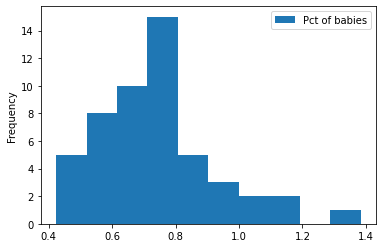

In [101]:
q = state_pcts.query("Name == 'Emma'").sort_values(by='Pct of babies')
q
print("mean pct of babies named Emma: ",q.mean().values[0])
print("Standard deviation of babies named Emma: ",q.std().values[0])
emma = state_pcts.query("Name == 'Emma' and State == 'VT'").values[0]
print("Emma is %.2f standard deviations above the mean in Vermont" % ((emma - q.mean())/q.std()) )  # P(X > x) = 0.00038
q.plot.hist()

In [103]:
import scipy.stats
1 - scipy.stats.norm(q.mean(), q.std()).cdf(emma)  # probability that a value of the percentage of Emma is greater than Emma

array([0.0003828])